# Group 4 Code

---

### Step 1: Data Preprocessing

1. Loading Datasets:
The first dataset (df) is loaded from a CSV file named 'atlantic.csv'.
The shape of the DataFrame is printed using print("Shape of df:", df.shape).
The first few rows of the DataFrame are displayed using df.head().

2. Loading the Second Dataset 'df2':
The second dataset (df2) is loaded from a CSV file named 'storms.csv'.
An extraneous index column named 'Unnamed: 0' is dropped using df2.drop(['Unnamed: 0'], axis=1, inplace=True).
The first few rows of the DataFrame are displayed using df2.head().

In [ ]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
# Load the first dataset.
df = pd.read_csv('atlantic.csv')

# Print the shape of `df`.
print("Shape of df:", df.shape)

# Check DataFrame before cleaning
df.head()

Shape of df: (49105, 22)


,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [ ]:
# Load the second set of data
df2 = pd.read_csv('storms.csv')

# drop extraneous index column
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

# Check DataFrame before cleaning
df2.head()

,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
2,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
3,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
4,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN


In [ ]:
# Status can be the following types:
# TD – Tropical cyclone of tropical depression intensity (< 34 knots)
# TS – Tropical cyclone of tropical storm intensity (34-63 knots)
# HU – Tropical cyclone of hurricane intensity (> 64 knots)
# EX – Extratropical cyclone (of any intensity)
# SD – Subtropical cyclone of subtropical depression intensity (< 34 knots)
# SS – Subtropical cyclone of subtropical storm intensity (> 34 knots)
# LO – A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)
# WV – Tropical Wave (of any intensity)
# DB – Disturbance (of any intensity)

---

### Step 2: Data Cleaning
DataFrame 'df' Cleaning:
* Converted 'Date' column to datetime format using the '%Y%m%d' format.
* Converted 'Latitude' and 'Longitude' columns to numeric types.
* Formatted 'Time' column to HHMM format and converted it to a datetime.time object.
* Converted 'Status' column to a categorical type.

DataFrame 'df2' Cleaning:
* Created a new 'Date' column by combining 'year', 'month', 'day', and 'hour'.
* Selected relevant columns and renamed them as per requirements.

Combining DataFrames:
* Combined 'df' and 'df2' into 'combined_df'.
* Reset the index of 'combined_df'.

Standardizing 'Status' Values:
* Defined a dictionary for replacing 'Status' values with standardized abbreviations.
* Replaced 'Status' values using the dictionary.
* Removed leading/trailing whitespaces in the 'Status' column.

Creating 'final_df':
* Dropped unnecessary columns ('ID', 'Event').
* Handled missing values represented by -999, replacing them with the mean of the respective columns.
* Ensured the data is ready for further analysis.

In [ ]:
# Cleaning up the first dataframe 'df'
# Convert date column to datetime.
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [ ]:
# Convert latitude and longitude columns to numeric type.
df['Latitude'] = df['Latitude'].str[:-1].astype(float)
df['Longitude'] = df['Longitude'].str[:-1].astype(float)

In [ ]:
# Change all time to format HHMM.
df['Time'] = df['Time'].astype(str).apply(lambda x: x.zfill(4)[:2] + '00')

# Convert the column into Datetime.
df['Time'] = pd.to_datetime(df['Time'], format='%H%M').dt.time

In [ ]:
# Convert the status column to categorical.
df['Status'] = df['Status'].astype('category')

In [ ]:
# Cleaning up the second dataframe 'df2'
# get new date column from year month day hour
df2['Date'] = pd.to_datetime(df2[['year', 'month', 'day', 'hour']])
df2.head()

,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter,Date
0,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN,1975-06-27 00:00:00
1,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN,1975-06-27 06:00:00
2,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN,1975-06-27 12:00:00
3,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN,1975-06-27 18:00:00
4,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN,1975-06-28 00:00:00


In [ ]:
# Select relevant columns from df2 and rename them
new_df = df2[['Date', 'hour', 'status', 'lat', 'long', 'wind', 'pressure']].copy()
new_df.columns = ['Date', 'Time', 'Status', 'Latitude', 'Longitude', 'Maximum Wind', 'Minimum Pressure']

# Combine the 2 dataframes
combined_df = pd.concat([df, new_df])

# Reset the index
combined_df = combined_df.reset_index(drop=True)

# Display the combined DataFrame
print(combined_df.head())

         ID                 Name       Date      Time Event Status  Latitude  \
0  AL011851              UNNAMED 1851-06-25  00:00:00           HU      28.0   
1  AL011851              UNNAMED 1851-06-25  06:00:00           HU      28.0   
2  AL011851              UNNAMED 1851-06-25  12:00:00           HU      28.0   
3  AL011851              UNNAMED 1851-06-25  18:00:00           HU      28.1   
4  AL011851              UNNAMED 1851-06-25  21:00:00     L     HU      28.2   

   Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  Low Wind NW  \
0       94.8            80              -999  ...       -999.0       -999.0   
1       95.4            80              -999  ...       -999.0       -999.0   
2       96.0            80              -999  ...       -999.0       -999.0   
3       96.5            80              -999  ...       -999.0       -999.0   
4       96.8            80              -999  ...       -999.0       -999.0   

   Moderate Wind NE  Moderate Wind SE  Moder

In [ ]:
# Define a dictionary for replacement for status
replacement_dict = {'tropical storm': 'TS',
                    'hurricane': 'HU',
                    'tropical depression': 'TD',
                    'extratropical': 'EX',
                    'other low': 'LO',
                    'subtropical storm': 'SS',
                    'subtropical depression': 'SD',
                    'tropical wave': 'WV',
                    'disturbance': 'DB'}

# Replace values in the 'Status' column using the dictionary
combined_df['Status'] = combined_df['Status'].replace(replacement_dict)

# Remove any leading/trailing whitespaces in the 'Status' column
combined_df['Status'] = combined_df['Status'].str.strip()

In [ ]:
# Create a final DataFrame by dropping unnecessary columns.
final_df = combined_df.drop(columns=['ID', 'Event'])

# Handle missing values represented by -999.
final_df.replace(-999, np.nan, inplace=True)
final_df.fillna(df.mean(), inplace=True)

# Check final DataFrame
final_df.tail()

C:\Users\noely\AppData\Local\Temp\ipykernel_17040\2380840744.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  final_df.fillna(df.mean(), inplace=True)


C:\Users\noely\AppData\Local\Temp\ipykernel_17040\2380840744.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_df.fillna(df.mean(), inplace=True)


,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
68166,NaN,2021-11-07 00:00:00,0,TS,37.4,-37.4,35,1003.0,-868.671031,-869.315772,-872.676428,-871.409245,-875.57094,-875.765319,-876.682028,-876.323205,-877.564321,-877.655045,-877.923552,-877.786295
68167,NaN,2021-11-07 06:00:00,6,TS,38.1,-36.4,35,1004.0,-868.671031,-869.315772,-872.676428,-871.409245,-875.57094,-875.765319,-876.682028,-876.323205,-877.564321,-877.655045,-877.923552,-877.786295
68168,NaN,2021-11-07 12:00:00,12,LO,39.2,-34.9,35,1006.0,-868.671031,-869.315772,-872.676428,-871.409245,-875.57094,-875.765319,-876.682028,-876.323205,-877.564321,-877.655045,-877.923552,-877.786295
68169,NaN,2021-11-07 18:00:00,18,LO,40.9,-32.8,40,1006.0,-868.671031,-869.315772,-872.676428,-871.409245,-875.57094,-875.765319,-876.682028,-876.323205,-877.564321,-877.655045,-877.923552,-877.786295
68170,NaN,2021-11-08 00:00:00,0,LO,43.2,-29.7,40,1006.0,-868.671031,-869.315772,-872.676428,-871.409245,-875.57094,-875.765319,-876.682028,-876.323205,-877.564321,-877.655045,-877.923552,-877.786295


---

### Step 3: Data Visualization

## Frequency of Hurricanes by Month.

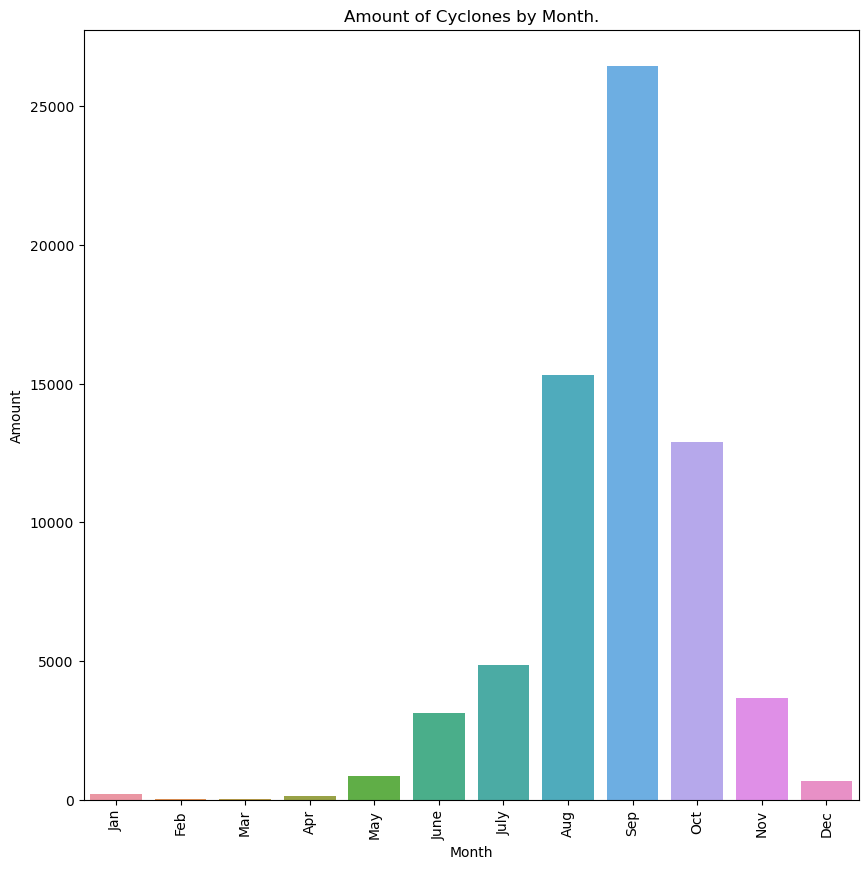

In [ ]:
# Extract month from the 'Date' column.
final_df ['Month'] = final_df['Date'].dt.month

# Create a bar plot for the frequency of cyclones by month.
plt.figure(figsize=(10, 10))
plt.title('Amount of Cyclones by Month.')
ax = sns.countplot(x='Month', data=final_df, order=range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)
plt.ylabel('Amount')
plt.show()


The peak of hurricane activity in the Atlantic basin, encompassing the Atlantic Ocean, Caribbean Sea, and Gulf of Mexico, predominantly transpires in August, September, and October. This heightened activity is attributed to warmer sea surface temperatures, providing the requisite heat for hurricane development. During this period, lower wind shear and the pronounced Coriolis effect at higher latitudes contribute to the favorable atmospheric conditions for hurricanes. The late summer and early fall also witness increased moisture and instability, fostering the formation of organized clusters of thunderstorms that can evolve into tropical cyclones. Historical records further underscore the concentration of Atlantic hurricanes during these peak months, although hurricane season officially spans from June 1 to November 30, allowing for occurrences outside the traditional peak timeframe based on specific atmospheric conditions.

---

## Frequency of Cyclones by Year

In [ ]:
import altair as alt
# group hurricanes by name and year, we're going to try to find the total number of hurricanes per year

# Extract year from the 'Date' column.
final_df ['Year'] = final_df ['Date'].dt.year

# this is the # of hurricanes per year
counts = pd.DataFrame(final_df['Year'].value_counts()).reset_index()

# Rename the columns
counts = counts.rename(columns={'index': 'Year', 'Year': 'count'})

# Sort the DataFrame by 'Year' in descending order
counts = counts.sort_values(by='Year').reset_index(drop = True)

counts.head()

,Year,count
0,1851,98
1,1852,134
2,1853,100
3,1854,60
4,1855,35


In [ ]:
# Chart
hurricanes = alt.Chart(counts).mark_bar().encode(
    x=alt.X('Year'),
    y=alt.Y('count', scale=alt.Scale(domain=[0, 20])),
    tooltip=['Year', 'count:Q']
).properties(
    width=1000,
    height=1,  # Adjust the height as needed
    title='Total Number of Hurricanes per Year'
)

# Trendline
trendline = hurricanes.transform_regression('Year', 'count').mark_line(color='red')

# Combine the chart and trendline
chart_with_trendline = (hurricanes + trendline)

# Display the chart
chart_with_trendline

alt.LayerChart(...)

The increase in the number of cyclones over the years can be attributed to a combination of natural climate variability and human-induced factors. Climate change, driven by the accumulation of greenhouse gases in the atmosphere, has led to rising sea surface temperatures, providing a conducive environment for cyclone formation and intensification. Changes in atmospheric circulation patterns and increased ocean heat content contribute to the observed trend. Additionally, advancements in technology and monitoring systems have enhanced our ability to detect and record cyclones, leading to improved data collection and reporting. However, it's crucial to acknowledge the complex interplay of natural climate variability and anthropogenic influences in understanding the upward trajectory of cyclone frequency.

---

## Frequency of Cyclones by category.

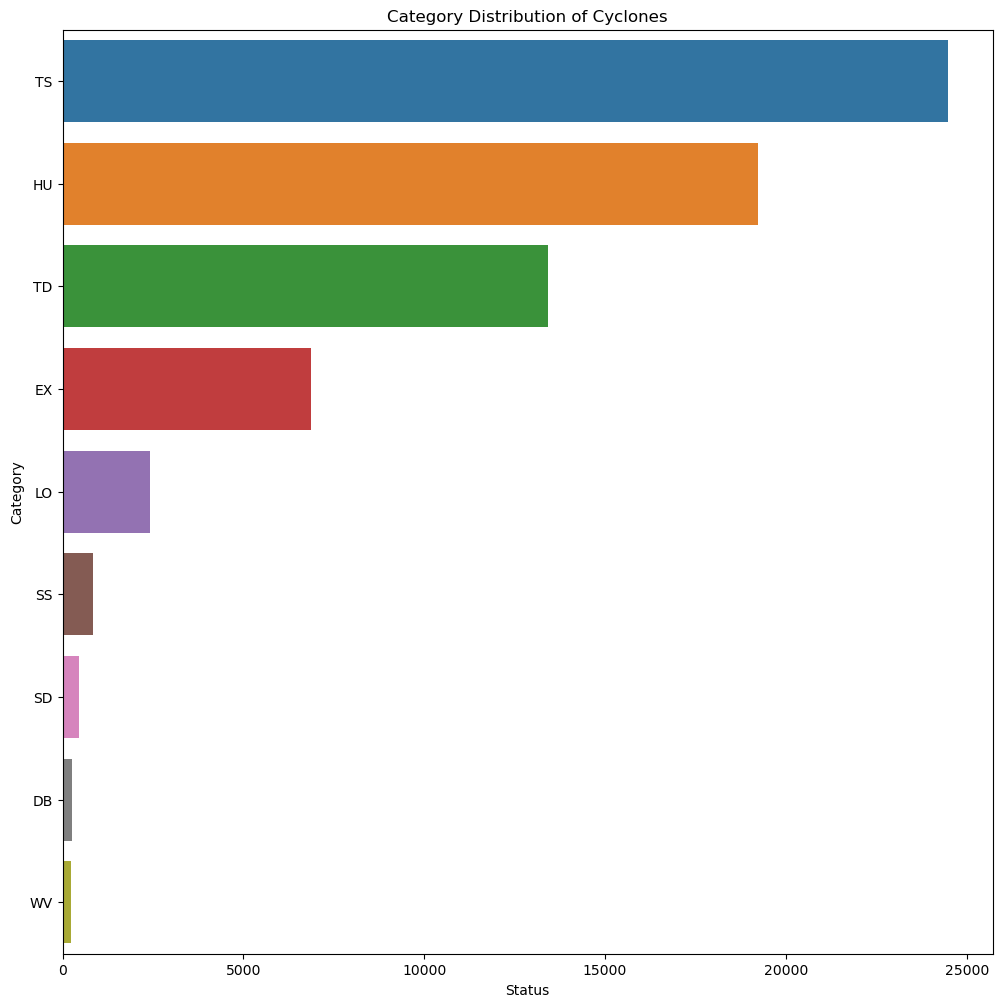

In [ ]:
# Create a bar plot for the frequency of cyclones by category.

temp = final_df['Status'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 12))
plt.title('Category Distribution of Cyclones')
plt.xlabel('Amount')
plt.ylabel('Category')
sns.barplot(y=temp.index, x=temp)
plt.show()

This shows an imbalance in the dataset

---

## Distribution of Amount of Cyclones
The resulting plot is a probability distribution curve that shows the likelihood of observing a certain number of cyclones in a given year. It provides an overview of the distribution of cyclone frequencies across different years.

C:\Users\noely\AppData\Local\Temp\ipykernel_17040\3627545804.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['Date'].values , norm_hist = True , axlabel = 'Probability Distribution of Amount of Cyclones.')


<Axes: title={'center': 'Likelihood of Observing Cyclones in a Given Year'}, xlabel='Probability Distribution of Amount of Cyclones.', ylabel='Density'>

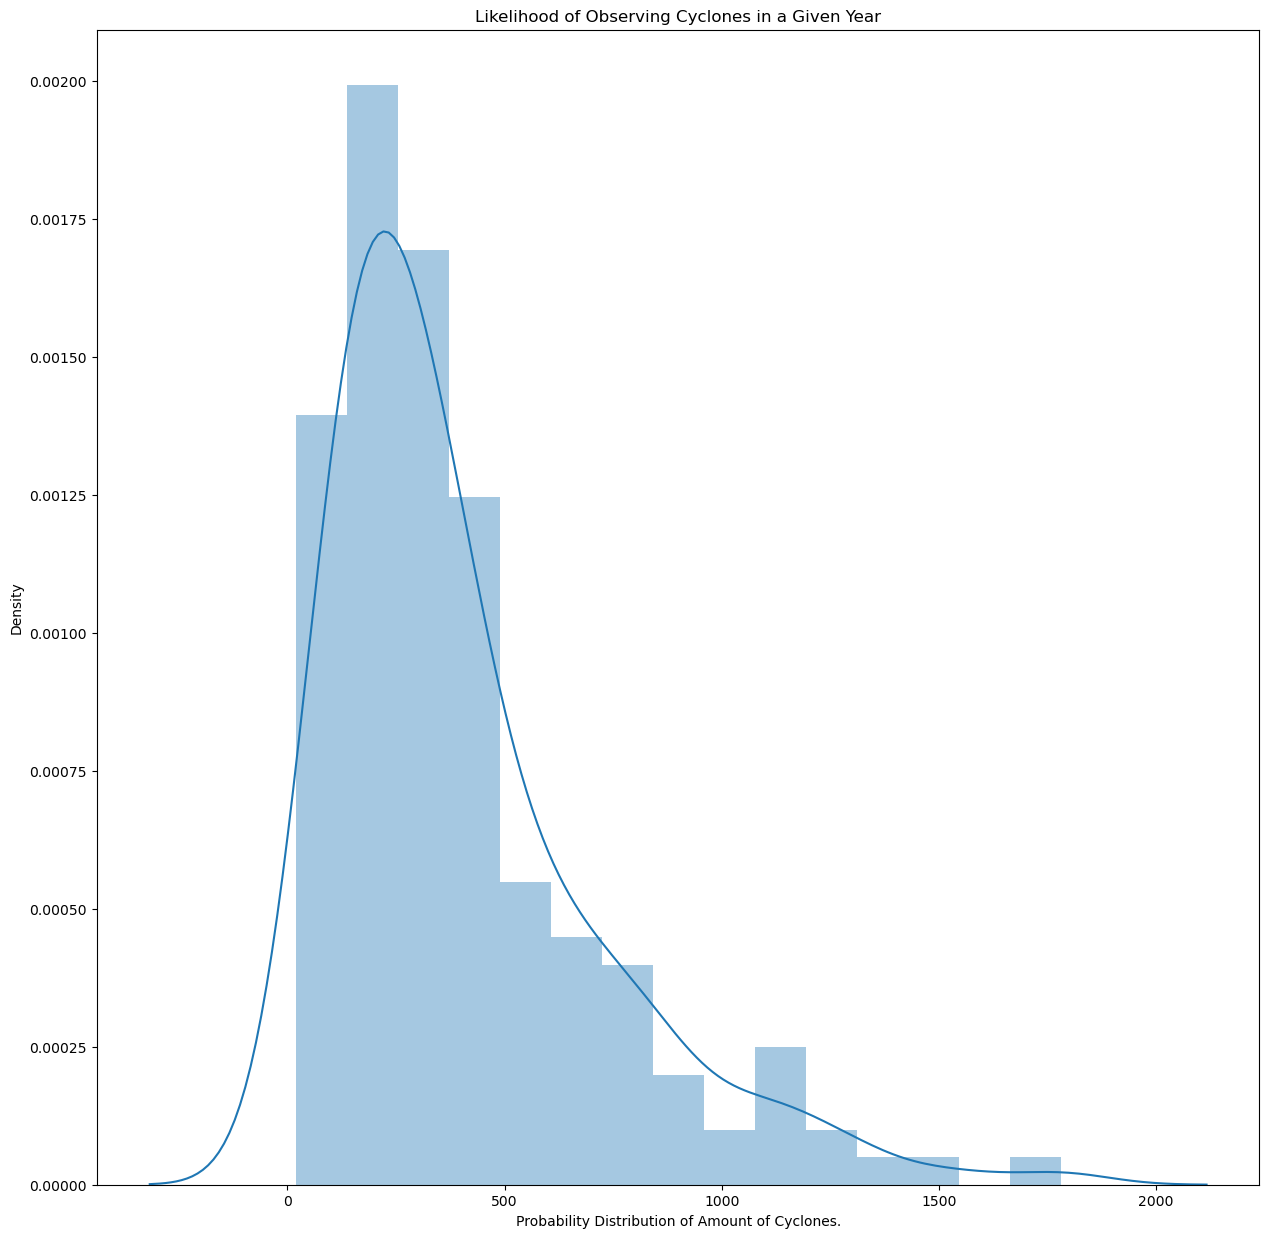

In [ ]:
# Probability Distribution Function of Frequency.
# Groups data by Year andcorts by number of cyclones in descending order
temp = final_df.groupby('Year').count().sort_values(by = 'Date' , ascending = False)
plt.figure(figsize=(15,15))
plt.title('Likelihood of Observing Cyclones in a Given Year')
sns.distplot(temp['Date'].values , norm_hist = True , axlabel = 'Probability Distribution of Amount of Cyclones.')

---

 ### Step 4: Modeling

## 1. Decision Tree.
1. Data Splitting: It splits the dataset into training and testing sets using the train_test_split function, where the independent variables (X) exclude the 'Status', 'Date', and 'Time' columns, and the dependent variable (y) is the 'Status' column.
2. Decision Tree Model Definition: It defines a Decision Tree Classifier (DT) with class weights set to 'balanced' to address the imbalanced nature of the 'Status' classes. The random state is also set for reproducibility.
3. Hyperparameter Tuning: It uses Grid Search Cross-Validation (GridSearchCV) to find the best hyperparameters for the Decision Tree model. The grid of hyperparameters includes maximum depth (max_depth) and minimum samples per leaf (min_samples_leaf).
4. Model Training: It trains the Decision Tree model with the best hyperparameters on the training set.
5. Visualization of the Decision Tree: It prints the maximum depth and the number of nodes of the best model and plots the structure of the best decision tree using plot_tree.
6. Feature Importance Plot: It plots a bar chart showing the importance of each feature in the decision-making process.
7. Model Evaluation: It evaluates the model on the test set by generating a classification report and a confusion matrix, providing metrics such as precision, recall, F1-score, and confusion between predicted and actual classes.

Overall, the code aims to build, tune, visualize, and evaluate a Decision Tree model for classifying hurricane statuses based on various features, with a focus on handling imbalanced classes.

In [ ]:
from sklearn.model_selection import train_test_split

# Set the dependent and independent variables.
X = final_df.drop(['Name', 'Status', 'Date', 'Time'], axis=1)
y = final_df['Status']

# Data Split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree model DT.
DT = DecisionTreeClassifier(class_weight='balanced', random_state= 42)
# class weight is balanced due to an imbalanced dataset in terms of 'Status'

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid.
params = {'max_depth': [10,20,50,100,200,500],
         'min_samples_leaf': [1,2,5,10,20,50]}

# Generate scenarios using `GridSearchCV`.
grid = GridSearchCV(estimator=DT,param_grid=params,
                  scoring='f1_macro', cv=10)

In [ ]:
# Model training
grid_result = grid.fit(X_train_val,y_train_val)

In [ ]:
# Print the best score and the best parameter value.
print(f'Best Score: {grid_result.best_score_:.2f}')
print('Best Params: ', grid_result.best_params_)

Best Score: 0.83
Best Params:  {'max_depth': 50, 'min_samples_leaf': 1}


Max depth is 35
The number of node is  6805


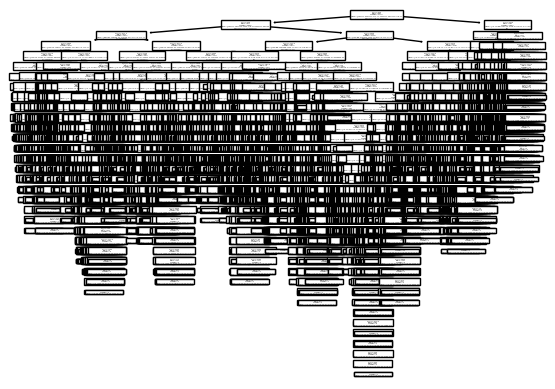

In [ ]:
from sklearn.tree import plot_tree

# Define `best_model` with the best hyperparameter values.
best_model = grid_result.best_estimator_

# Print the max depth and the number of nodes of the best model.
print('Max depth is', best_model.tree_.max_depth)
print('The number of node is ' , best_model.tree_.node_count)

# Plot the best tree model.
plot_tree(best_model);

[0.26 0.06 0.26 0.06 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.07 0.28]


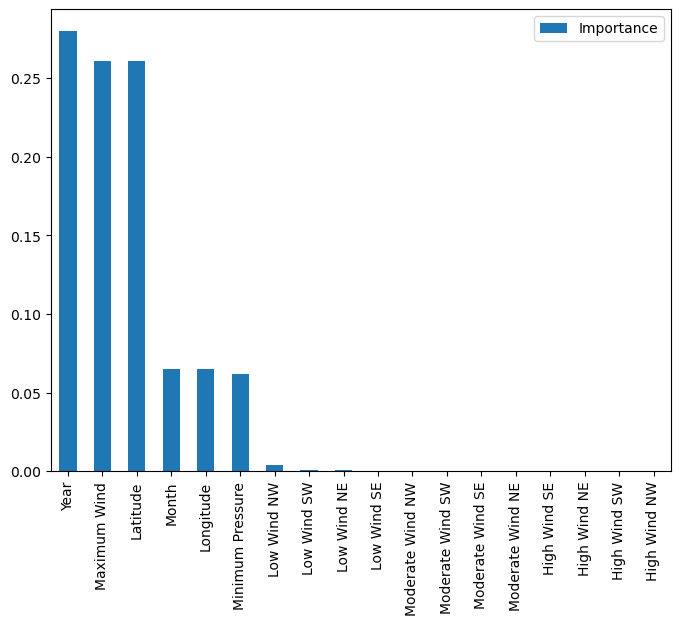

In [ ]:
import matplotlib.pyplot as plt
# Print the feature importances (round to two decimal places).
print(np.round(best_model.feature_importances_,2))

feat_importances = pd.DataFrame(best_model.feature_importances_,
                                index=X.columns,
                                columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6));

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Classify using the test set.
y_predict = best_model.predict(X_test)

# Print classification report.
print('classification report----------')
print(classification_report(y_test, y_predict))

# Print the confusion matrix.
print('confusion matrix---------------')
cm = pd.DataFrame(confusion_matrix(y_test, y_predict))
cm

classification report----------
              precision    recall  f1-score   support

          DB       0.80      0.84      0.82        77
          EX       0.81      0.80      0.81      2029
          HU       0.99      0.99      0.99      5803
          LO       0.83      0.83      0.83       715
          SD       0.77      0.70      0.74       151
          SS       0.76      0.66      0.71       267
          TD       0.95      0.96      0.96      3985
          TS       0.96      0.96      0.96      7351
          WV       0.96      0.74      0.84        74

    accuracy                           0.94     20452
   macro avg       0.87      0.83      0.85     20452
weighted avg       0.94      0.94      0.94     20452

confusion matrix---------------


,0,1,2,3,4,5,6,7,8
0,65,0,0,1,0,0,8,3,0
1,0,1628,62,28,4,6,60,241,0
2,0,56,5747,0,0,0,0,0,0
3,5,29,0,596,2,0,72,11,0
4,0,8,0,0,106,0,37,0,0
5,0,12,3,7,0,176,0,69,0
6,6,63,0,69,25,0,3820,0,2
7,5,207,0,17,0,49,0,7073,0
8,0,0,0,2,0,0,15,2,55



Key Observations:

The decision tree model demonstrates strong performance with high precision and recall across different cyclone classes.
Hurricane (HU) and Tropical Depression (TD) classes exhibit exceptional precision, recall, and F1-scores, with HU achieving 0.99 and TD achieving 0.96.
Other cyclone classes, such as Extratropical (EX) and Tropical Storm (TS), also show high precision and recall, contributing to the overall model effectiveness.
Classes like Subtropical Depression (SD) and Subtropical Storm (SS) display relatively lower F1-scores, suggesting potential areas for model refinement.

Overall Evaluation:

The decision tree model attains an impressive accuracy of 94%, indicating its proficiency in classifying various cyclone types.
The model's robust performance, particularly in accurately identifying hurricanes and tropical depressions, contributes to its overall effectiveness.
While the model excels in most classes, further analysis and potential adjustments could be explored for classes with lower F1-scores to enhance overall model performance and address specific challenges within those categories.

## 2. Random Forest.
1. Data Splitting: It splits the dataset into training and testing sets using the train_test_split function, where the independent variables (X) exclude the 'Status', 'Date', and 'Time' columns, and the dependent variable (y) is the 'Status' column.
2. Random Forest Model Definition: It defines a Random Forest Classifier (RF) with class weights set to 'balanced' to address the imbalanced nature of the 'Status' classes. The random state is also set for reproducibility.
3. Hyperparameter Tuning: It uses Grid Search Cross-Validation (GridSearchCV) to find the best hyperparameters for the Random Forest model. The grid of hyperparameters includes maximum depth (max_depth) and minimum samples per leaf (min_samples_leaf).
4. Model Training: It trains the Random Forest model with the best hyperparameters on the training set.
5. Visualization of a Decision Tree within the Random Forest: It plots the structure of one decision tree within the Random Forest using plot_tree.
6. Feature Importance Plot: It plots a bar chart showing the importance of each feature in the decision-making process.
7. Model Evaluation: It evaluates the model on the test set by generating a classification report and a confusion matrix, providing metrics such as precision, recall, F1-score, and confusion between predicted and actual classes.

The overall goal of the code is to build, tune, visualize, and evaluate a Random Forest model for classifying hurricane statuses based on various features, with a focus on handling imbalanced classes.

In [ ]:
from sklearn.model_selection import train_test_split

# Set the dependent and independent variables.
X = final_df.drop(['Name', 'Status', 'Date', 'Time'], axis=1)
y = final_df['Status']

# Data Split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the decision tree model RF.
RF = RandomForestClassifier(class_weight='balanced', random_state= 42)
# class weight is balanced due to an imbalanced dataset in terms of 'Status'

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid.
params = {'max_depth': [10,20,50,100,200,500],
         'min_samples_leaf': [1,2,5,10,20,50]}

# Generate scenarios using `GridSearchCV`.
grid = GridSearchCV(estimator=RF,param_grid=params,
                  scoring='f1_macro', cv=10)

In [ ]:
# Model training
grid_result = grid.fit(X_train_val, y_train_val)

In [ ]:
# Print the best score and the best parameter value.
print(f'Best Score: {grid_result.best_score_:.2f}')
print('Best Params: ', grid_result.best_params_)

Best Score: 0.85
Best Params:  {'max_depth': 50, 'min_samples_leaf': 2}


In [ ]:
# Define `best_model` with the best hyperparameter values.
best_model = grid_result.best_estimator_

# Print the feature importances (round to two decimal places).
print(np.round(best_model.feature_importances_,2))


[0.22 0.11 0.26 0.11 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.07 0.2 ]


[0.22 0.11 0.26 0.11 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.07 0.2 ]


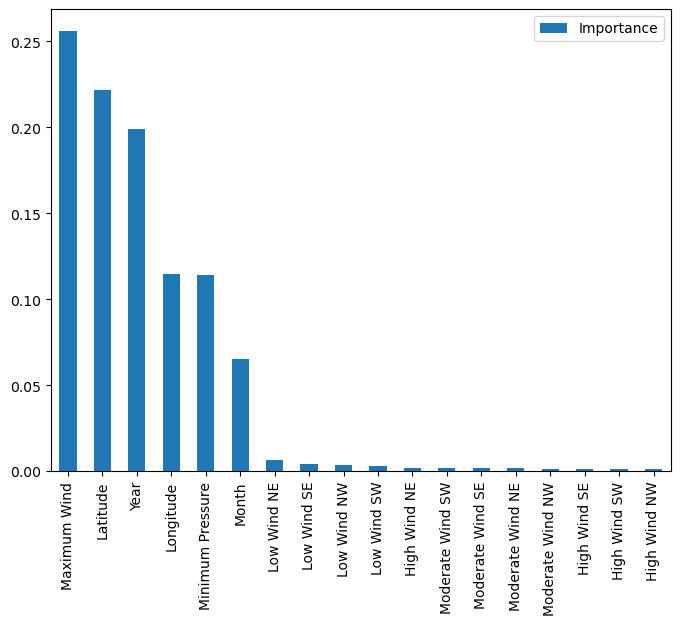

In [ ]:
import matplotlib.pyplot as plt

# Print the feature importances (round to two decimal places).
print(np.round(best_model.feature_importances_,2))

feat_importances = pd.DataFrame(best_model.feature_importances_,
                                index=X.columns,
                                columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6));

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Classify using the test set.
y_predict = best_model.predict(X_test)

# Print classification report.
print('classification report----------')
print(classification_report(y_test, y_predict))

# Print the confusion matrix.
print('confusion matrix---------------')
cm = pd.DataFrame(confusion_matrix(y_test, y_predict))
cm

classification report----------
              precision    recall  f1-score   support

          DB       0.82      0.81      0.81        77
          EX       0.86      0.85      0.85      2029
          HU       0.99      0.99      0.99      5803
          LO       0.80      0.85      0.82       715
          SD       0.89      0.73      0.80       151
          SS       0.82      0.68      0.74       267
          TD       0.95      0.96      0.96      3985
          TS       0.97      0.97      0.97      7351
          WV       0.92      0.81      0.86        74

    accuracy                           0.95     20452
   macro avg       0.89      0.85      0.87     20452
weighted avg       0.95      0.95      0.95     20452

confusion matrix---------------


,0,1,2,3,4,5,6,7,8
0,62,0,0,6,0,0,4,5,0
1,0,1717,54,30,3,8,63,154,0
2,0,34,5768,0,0,0,0,1,0
3,5,19,1,608,1,2,63,16,0
4,0,0,0,0,110,0,41,0,0
5,0,11,3,4,0,181,0,68,0
6,6,25,0,104,10,0,3837,0,3
7,3,189,0,8,0,30,0,7119,2
8,0,0,0,1,0,0,12,1,60


Key Observations:

The random forest model demonstrates excellent performance with high precision, recall, and F1-scores across diverse cyclone classes.
Hurricane (HU) and Tropical Depression (TD) classes exhibit outstanding precision, recall, and F1-scores, with HU achieving 0.99 and TD achieving 0.96.
Most cyclone classes, including Extratropical (EX) and Tropical Storm (TS), show robust precision and recall, contributing to the overall efficacy of the model.
Subtropical Depression (SD) and Subtropical Storm (SS) classes display improved F1-scores compared to the decision tree model, showcasing enhanced performance.
Overall Evaluation:

The random forest model achieves an impressive accuracy of 95%, indicating its proficiency in accurately classifying various cyclone types.
The model's strength lies in its ability to effectively identify hurricanes, tropical depressions, and other cyclone classes, resulting in high precision and recall values.
The model's enhanced performance in classes with previously lower F1-scores, such as SD and SS, suggests its capability to address specific challenges within those categories.
The robust overall evaluation underscores the effectiveness of the random forest model in cyclone classification, with potential for further refinement in specific class distinctions for continued improvement.

## 3. Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare the data

# Create the feature matrix X using unique years
X = pd.DataFrame(final_df['Year'].unique(), columns=['Year'])
y = counts['count'] # Assuming each row is a separate hurricane instance, use the index as the count

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a linear regression model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 51850.672863154476
R-squared: 0.4765662169425732


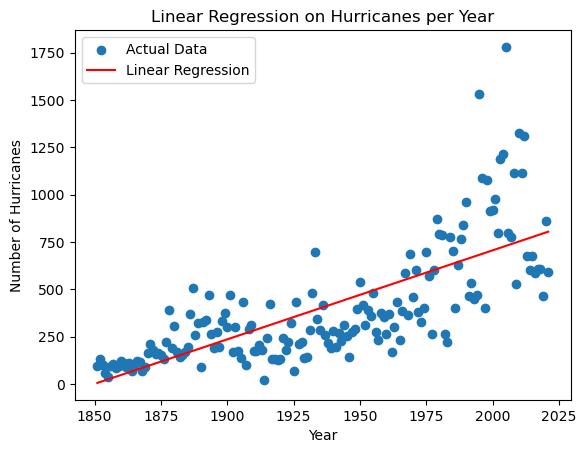

In [ ]:
# Plot the data and the linear regression line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.title('Linear Regression on Hurricanes per Year')
plt.legend()
plt.show()

## 3. Polynomial Regression

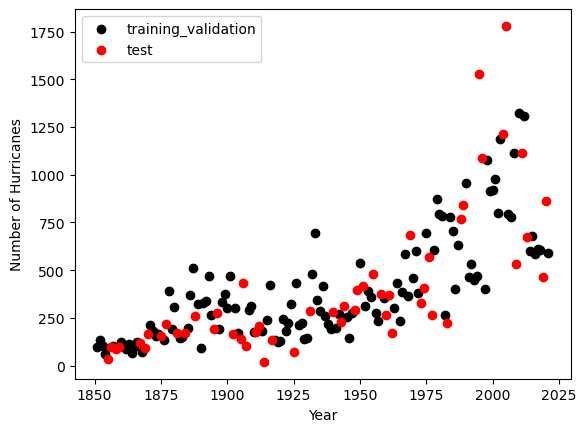

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# Data Split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.scatter(X_train_val, y_train_val, c='k', label='training_validation')
plt.scatter(X_test, y_test, c='r', label='test')
plt.legend()

In [ ]:
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# Define Ridge regression
ridge = Ridge()

# Define polynomial features
poly = PolynomialFeatures(4)

# Combine them in a pipeline
model = make_pipeline(poly, scaler, ridge)

In [ ]:
# Find optimal alpha with grid search
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
powers=range(2,11)
param_grid = {'ridge__alpha' :alpha_values,
              'polynomialfeatures__degree': list(powers)}

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_result = grid.fit(X_train_val, y_train_val)

print('Best Score:', grid_result.best_score_)
print('Best Params:', grid_result.best_params_)
print('Best Estimator:', grid_result.best_estimator_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


Best Score: -32228.01567249531
Best Params: {'polynomialfeatures__degree': 6, 'ridge__alpha': 0.1}
Best Estimator: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1))])


R-squared: 0.5451131401472492
Ridge Coefficients: [   0.    -477.854 -276.46   -71.796  135.773  345.879  558.148]
Ridge Intercept: 398.193
Polynomial Features: ['1' 'Year' 'Year^2' 'Year^3' 'Year^4' 'Year^5' 'Year^6']


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


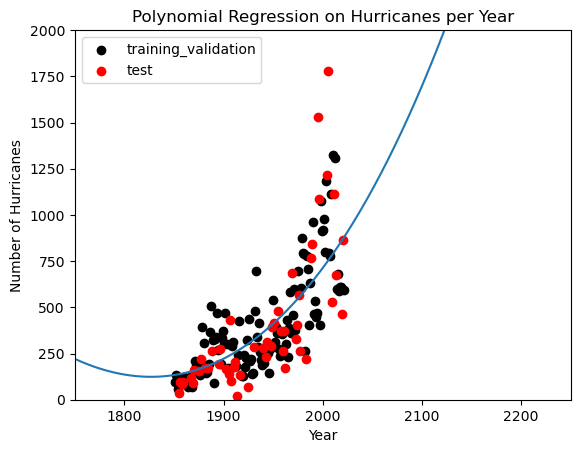

In [ ]:
# Best model
best_model = grid_result.best_estimator_
best_model.fit(X_train_val, y_train_val)

# Plot
plt.scatter(X_train_val, y_train_val, c='k', label='training_validation')
plt.scatter(X_test, y_test, c='r', label='test')
X_plot = np.linspace(1750, 2250, 500)[:, None]
y_plot = best_model.predict(X_plot)
plt.plot(X_plot, y_plot)
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.title('Polynomial Regression on Hurricanes per Year')
plt.legend()

plt.xlim(1750, 2250)
plt.ylim(0,2000)

# Display model parameters
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
print("Ridge Coefficients:", np.round(best_model.steps[2][1].coef_, 3))
print("Ridge Intercept:", np.round(best_model.steps[2][1].intercept_, 3))
print("Polynomial Features:", best_model.steps[0][1].get_feature_names_out())